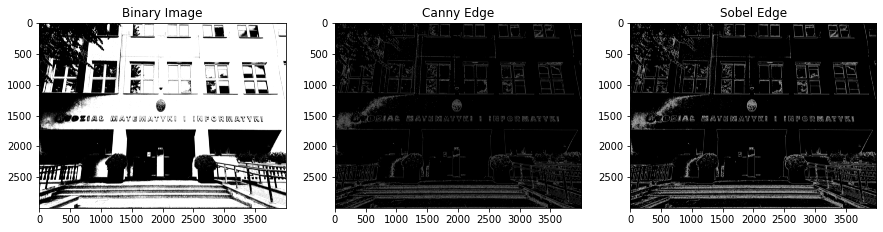

In [59]:
#EDGE DETECTION USING BINARY AND SOBEL

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from unittest import result

fpath = 'image1.jpg'
img = cv2.imread(fpath)

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


val, bin_img = cv2.threshold(img,100,150, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

img_canny = cv2.Canny(bin_img,200,400)


img_sobel_x = cv2.Sobel(bin_img, cv2.CV_64F, 1,0)
img_sobel_y = cv2.Sobel(bin_img, cv2.CV_64F, 0,1)
grad = np.sqrt(img_sobel_x**2+ img_sobel_y**2)
img_sobel_xy = (grad*255 / grad.max()).astype(np.uint8)


fig = plt.figure(figsize=(15,15))
gs = GridSpec(1,3)

fig.add_subplot(gs[0,0])
plt.title('Binary Image')
plt.imshow(bin_img, cmap='gray')

fig.add_subplot(gs[0,1])
plt.title('Canny Edge')
plt.imshow(img_canny, cmap='gray')

fig.add_subplot(gs[0,2])
plt.title('Sobel Edge')
plt.imshow(img_sobel_xy, cmap='gray')
plt.savefig('1.jpg')



(128, 133)
(658, 1173)


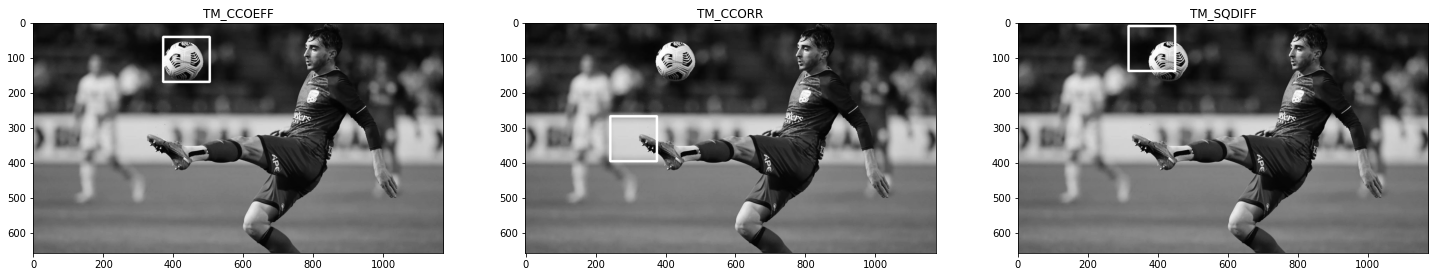

In [60]:
#TEMPLATE MATCHING

filepath1 = 'template1.jpg'
filepath2 = 'target1.jpg'

img_template = cv2.imread(filepath1)
img_target = cv2.imread(filepath2)

h,w,c = img_template.shape

img_template = cv2.cvtColor(img_template, cv2.COLOR_BGR2GRAY)
img_target = cv2.cvtColor(img_target, cv2.COLOR_BGR2GRAY)

img_template = cv2.resize(img_template,[133,128])

h2,w2 = img_template.shape

print(img_template.shape)
print(img_target.shape)

img_target = img_target.copy()
img_target_2 = img_target.copy()
img_target_3 = img_target.copy()
img_target_4 = img_target.copy()
img_target_5 = img_target.copy()
img_target_6 = img_target.copy()

result1 = cv2.matchTemplate(img_target, img_template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result1)
top_left = max_loc
top_left_norm = min_loc
bottom_right = [top_left[0]+w2, top_left[1]+h2]
cv2.rectangle(img_target,top_left,bottom_right, 255,5)

result2 = cv2.matchTemplate(img_target_2, img_template, cv2.TM_CCORR)
min_val_2, max_val_2, min_loc_2, max_loc_2 = cv2.minMaxLoc(result2)
top_left_2 = max_loc_2
top_left_norm_2 = min_loc_2
bottom_right_2 = [top_left_2[0]+w2, top_left_2[1]+h2]
cv2.rectangle(img_target_2,top_left_2,bottom_right_2, 255,5)

result3 = cv2.matchTemplate(img_target_3, img_template, cv2.TM_SQDIFF)
min_val_3, max_val_3, min_loc_3, max_loc_3 = cv2.minMaxLoc(result3)
top_left_3 = max_loc_3
top_left_norm_3 = min_loc_3
bottom_right_3 = [top_left_3[0]+w2, top_left_3[1]+h2]
cv2.rectangle(img_target_3,top_left_3,bottom_right_3, 255,5)

result4 = cv2.matchTemplate(img_target_4, img_template, cv2.TM_CCOEFF_NORMED)
min_val_4, max_val_4, min_loc_4, max_loc_4 = cv2.minMaxLoc(result4)
top_left_norm_4 = min_loc_4
bottom_right_4 = [top_left_norm_4[0]+w2, top_left_norm_4[1]+h2]
cv2.rectangle(img_target_4,top_left_norm_4,bottom_right_4, 255,5)

result5 = cv2.matchTemplate(img_target_5, img_template, cv2.TM_CCORR_NORMED)
min_val_5, max_val_5, min_loc_5, max_loc_5 = cv2.minMaxLoc(result5)
top_left_norm_5 = min_loc_5
bottom_right_5 = [top_left_norm_5[0]+w2, top_left_norm_5[1]+h2]
cv2.rectangle(img_target_5,top_left_norm_5,bottom_right_5, 255,5)

result6 = cv2.matchTemplate(img_target_6, img_template, cv2.TM_SQDIFF_NORMED)
min_val_6, max_val_6, min_loc_6, max_loc_6 = cv2.minMaxLoc(result6)
top_left_norm_6 = min_loc_6
bottom_right_6 = [top_left_norm_6[0]+w2, top_left_norm_6[1]+h2]
cv2.rectangle(img_target_6,top_left_norm_6,bottom_right_6, 255,5)


fig = plt.figure(figsize=(25,25))
gs = GridSpec(1,3)
'''
fig.add_subplot(gs[0,0])
plt.title('Template image')
plt.imshow(img_template, cmap='gray')
'''

fig.add_subplot(gs[0,0])
plt.title('TM_CCOEFF')
plt.imshow(img_target, cmap='gray')

fig.add_subplot(gs[0,1])
plt.title('TM_CCORR')
plt.imshow(img_target_2, cmap='gray')

fig.add_subplot(gs[0,2])
plt.title('TM_SQDIFF')
plt.imshow(img_target_3, cmap='gray')

plt.savefig('2.jpg')



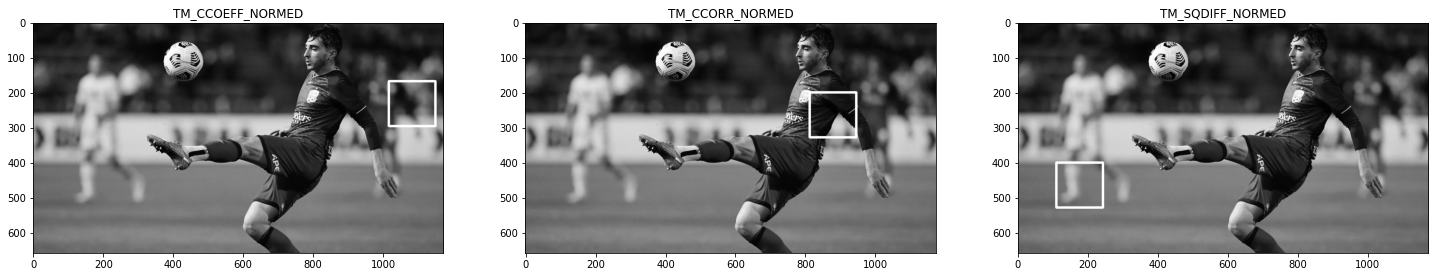

In [61]:
fig = plt.figure(figsize=(25,25))
gs = GridSpec(2,3)

fig.add_subplot(gs[1,0])
plt.title('TM_CCOEFF_NORMED')
plt.imshow(img_target_4, cmap='gray')

fig.add_subplot(gs[1,1])
plt.title('TM_CCORR_NORMED')
plt.imshow(img_target_5, cmap='gray')

fig.add_subplot(gs[1,2])
plt.title('TM_SQDIFF_NORMED')
plt.imshow(img_target_6, cmap='gray')

plt.savefig('3.jpg')